In [ ]:
pip install nashpy

In [ ]:
# Payoff matrix
import nashpy as nash
import numpy as np

# Parameter values
a = 0.90  # Benefit of attack
b = 0.79  # Benefit of defense
c = 0.51  # Cost of attack
d = 0.20  # Cost of defense
w = 0.98  # Asset value/Loss to defender
v = 0.26  # Probability of successful defense

m = 0.1  # Probability of catching attacker in an unsecured system
n = 0  # Probability of catching attacker in a secure system
p = 0.1  # Fine to attacker for a successful attack
s = 0  # Fine to attacker for an unsuccessful attack

# Defender Payoff Matrix
D = np.array([
    [0, -w],                              # (No Defense, No Attack) | (No Defense, Attack)
    [-d + b, -d + v * b - w * (1 - v)],   # (Defense, No Attack)     | (Defense, Attack)
])

# Attacker Payoff Matrix
A = np.array([
    [0, -c + a - m * p],                      # (No Defense, No Attack) | (No Defense, Attack)
    [0, -c + a * (1 - v) - v * n * s - (1 - v) * m * p],  # (Defense, No Attack) | (Defense, Attack)
])
print("D=",D)
print("A=",A)

D= [[ 0.     -0.98  ]
 [ 0.59   -0.7198]]
A= [[0.     0.38  ]
 [0.     0.1486]]


<Figure size 640x480 with 0 Axes>

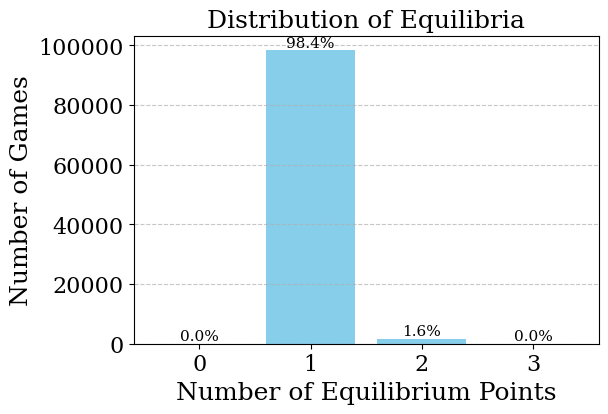

In [ ]:
# Distribution of stable equilibria
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/content/count_eq.xlsx"  # Adjust if needed
df = pd.read_excel(file_path)

# Count occurrences of 0, 1, 2, and 3 equilibria
equilibria_counts = df['total'].value_counts().reindex([0, 1, 2, 3], fill_value=0)

# Calculate percentages
total_games = len(df)
percentages = (equilibria_counts / total_games) * 100

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 11,         # Increase font size
    "axes.labelsize": 18,    # Label size for x and y axes
    "axes.titlesize": 18,    # Title font size
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 16,   # Legend font size
    "figure.titlesize": 16   # Figure title size
})
plt.savefig("11a.pdf", dpi=300, bbox_inches='tight', format='pdf')

# Create the bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(equilibria_counts.index, equilibria_counts.values, color='skyblue')
plt.xlabel("Number of Equilibrium Points")
plt.ylabel("Number of Games")
plt.title("Distribution of Equilibria")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5 ,f'{percentage:.1f}%', ha='center', va='bottom')

plt.xticks([0, 1, 2, 3])  # Ensure ticks are at 0, 1, 2, 3
plt.savefig(f"11a.pdf", dpi=300, bbox_inches='tight', format='pdf')
plt.show()

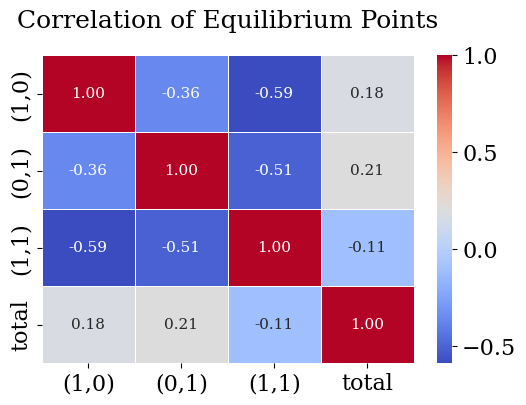

In [4]:
# Coorelation of equilibrium points
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file into a pandas DataFrame
try:
    df = pd.read_excel('/content/count_eq.xlsx')
except FileNotFoundError:
    print("Error: File not found. Please make sure the file path is correct.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

# Select relevant columns for correlation analysis
columns_for_correlation = ['(1,0)', '(0,1)', '(1,1)', 'total']
correlation_data = df[columns_for_correlation]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 11,         # Increase font size
    "axes.labelsize": 18,    # Label size for x and y axes
    "axes.titlesize": 18,    # Title font size
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 16,   # Legend font size
    "figure.titlesize": 16   # Figure title size
})

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation of Equilibrium Points", pad=20)

# Access the axes object
ax = plt.gca()
plt.savefig(f"11b.pdf", dpi=300, bbox_inches='tight', format='pdf')
plt.show()

In [5]:
df.head(10)

,game,a,b,c,d,w,v,"(0,0)","(0,1)","(1,0)","(1,1)",total
0,1,1.237210,0.759270,0.277724,0.222268,0.882448,0.701985,0,0,0,1,1
1,2,0.227036,0.044026,0.035943,0.026237,0.111446,0.350444,0,0,0,1,1
2,3,0.099691,0.051056,0.045514,0.044902,0.054493,0.537495,0,0,0,1,1
3,4,0.727088,0.819076,0.131737,0.784100,0.833999,0.048355,0,1,0,0,1
4,5,0.748929,0.289711,0.088607,0.118323,0.294615,0.449533,0,0,0,1,1
5,6,1.044253,0.767942,0.117810,0.538955,0.918302,0.966101,0,0,1,0,1
6,7,0.989938,0.051508,0.028487,0.004670,0.124682,0.073129,0,0,0,1,1
7,8,0.576110,0.162485,0.005952,0.016057,0.189307,0.369276,0,0,0,1,1
8,9,0.969729,0.235461,0.011940,0.218243,0.313502,0.284252,0,1,0,0,1
9,10,0.559901,0.564033,0.154573,0.229405,0.636837,0.371760,0,0,0,1,1


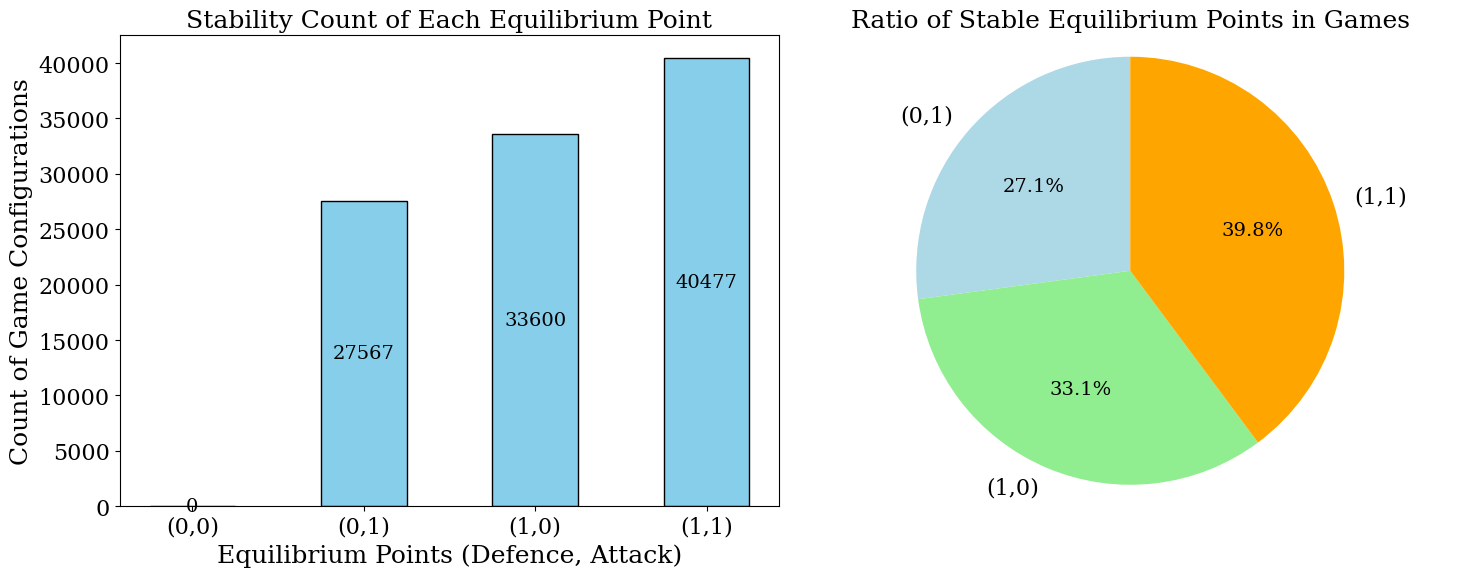

In [ ]:
#Count and Ratio of Stable Equilibrium Points in Random Games without penalty
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status.xlsx')

# Calculate the number of stable configurations for each equilibrium point
equilibrium_counts = df[['(0,0)', '(0,1)', '(1,0)', '(1,1)']].sum()

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14,         # Increase font size
    "axes.labelsize": 18,    # Label size for x and y axes
    "axes.titlesize": 18,    # Title font size
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 16,   # Legend font size
    "figure.titlesize": 16   # Figure title size
})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot (subplot 1)
bars = ax1.bar(equilibrium_counts.index, equilibrium_counts.values, width=0.5, color='skyblue', edgecolor='black')

# Add count labels on top of each bar diagonally
for bar, count in zip(bars, equilibrium_counts.values):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, str(int(count)),
             ha='center', va='center', color='black')

# Bar plot settings
ax1.set_xlabel('Equilibrium Points (Defence, Attack)')
ax1.set_ylabel('Count of Game Configurations')
ax1.set_title('Stability Count of Each Equilibrium Point')
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')

# Pie plot (subplot 2)
equilibrium_counts_pie = df[['(0,1)', '(1,0)', '(1,1)']].sum()
ax2.pie(
    equilibrium_counts_pie,
    labels=equilibrium_counts_pie.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen', 'orange', 'salmon']
)
ax2.set_title('Ratio of Stable Equilibrium Points in Games')
ax2.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

plt.tight_layout()

# Show the plot
plt.savefig(f"12.pdf", dpi=300, bbox_inches='tight', format='pdf')
plt.show()

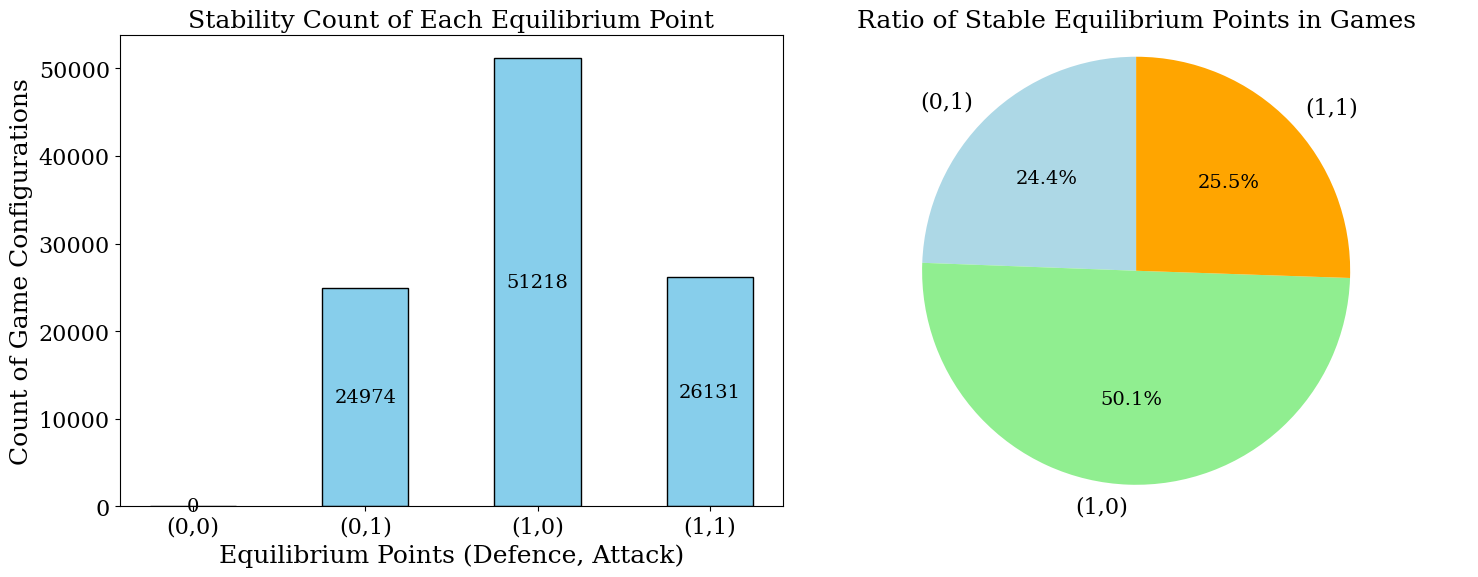

In [ ]:
#Count and Ratio of Stable Equilibrium Points in Random Games with penalty 0.1
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status2.xlsx')

# Calculate the number of stable configurations for each equilibrium point
equilibrium_counts = df[['(0,0)', '(0,1)', '(1,0)', '(1,1)']].sum()

plt.rcParams.update({
    "font.size": 14,         # Increase font size
    "axes.labelsize": 18,    # Label size for x and y axes
    "axes.titlesize": 18,    # Title font size
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 16,   # Legend font size
    "figure.titlesize": 16   # Figure title size
})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot (subplot 1)
bars = ax1.bar(equilibrium_counts.index, equilibrium_counts.values, width=0.5, color='skyblue', edgecolor='black')

# Add count labels on top of each bar diagonally
for bar, count in zip(bars, equilibrium_counts.values):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, str(int(count)),
             ha='center', va='center', color='black')

# Bar plot settings
ax1.set_xlabel('Equilibrium Points (Defence, Attack)')
ax1.set_ylabel('Count of Game Configurations')
ax1.set_title('Stability Count of Each Equilibrium Point')
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')

# Pie plot (subplot 2)
equilibrium_counts_pie = df[['(0,1)', '(1,0)', '(1,1)']].sum()
ax2.pie(
    equilibrium_counts_pie,
    labels=equilibrium_counts_pie.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen', 'orange', 'salmon']
)
ax2.set_title('Ratio of Stable Equilibrium Points in Games')
ax2.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

plt.tight_layout()

# Show the plot
plt.savefig(f"20.pdf", dpi=300, bbox_inches='tight', format='pdf')
plt.show()

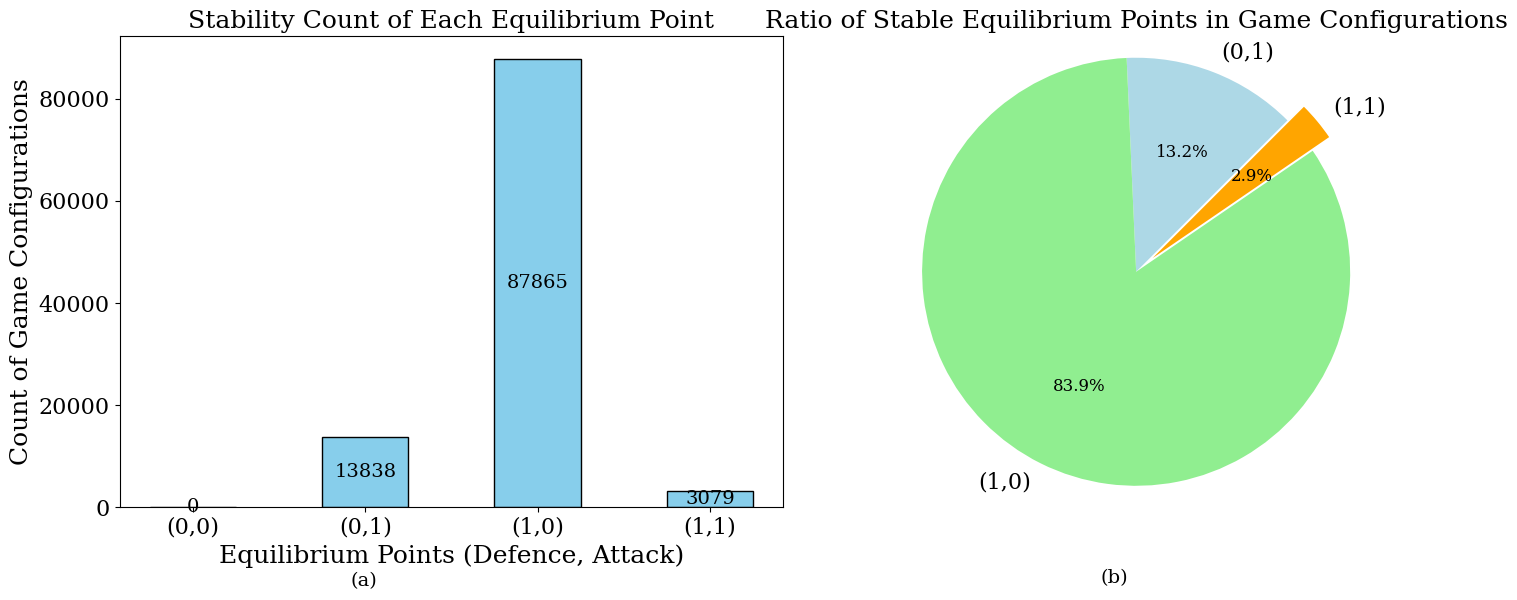

In [ ]:
#Count and Ratio of Stable Equilibrium Points in Random Games with penalty 0.5
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status3.xlsx')

# Calculate the number of stable configurations for each equilibrium point
equilibrium_counts = df[['(0,0)', '(0,1)', '(1,0)', '(1,1)']].sum()

plt.rcParams.update({
    "font.family": "serif",  # Use a serif font (like Times New Roman)
    "font.size": 14,         # Increase font size
    "axes.labelsize": 18,    # Label size for x and y axes
    "axes.titlesize": 18,    # Title font size
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 16,   # Legend font size
    "figure.titlesize": 16   # Figure title size
})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot (subplot 1)
bars = ax1.bar(equilibrium_counts.index, equilibrium_counts.values, width=0.5, color='skyblue', edgecolor='black')

# Add count labels on top of each bar diagonally
for bar, count in zip(bars, equilibrium_counts.values):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, str(int(count)),
             ha='center', va='center', color='black')

# Bar plot settings
ax1.set_xlabel('Equilibrium Points (Defence, Attack)')
ax1.set_ylabel('Count of Game Configurations')
ax1.set_title('Stability Count of Each Equilibrium Point')
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')

# Pie plot (subplot 2)
equilibrium_counts_pie = df[['(0,1)', '(1,0)', '(1,1)']].sum()

#Explode the smallest slice
explode = [0,0,0]
explode[equilibrium_counts_pie.argmin()] = 0.1

wedges, texts, autotexts = ax2.pie(
    equilibrium_counts_pie,
    labels=equilibrium_counts_pie.index,
    autopct='%1.1f%%',
    startangle=45, #Rotate 45 degrees
    explode=explode,
    colors=['lightblue', 'lightgreen', 'orange']
)

#Set the font size for the percentage labels
for autotext in autotexts:
    autotext.set_fontsize(12)


ax2.set_title('Ratio of Stable Equilibrium Points in Game Configurations')
ax2.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Add subplot annotations
fig.text(0.25, 0.005, '(a)', ha='center')  # Adjust coordinates and fontsize as needed
fig.text(0.75, 0.01, '(b)', ha='center')  # Adjust coordinates and fontsize as needed

plt.tight_layout()
plt.savefig(f"21.pdf", dpi=300, bbox_inches='tight', format='pdf')
# Show the plot
plt.show()


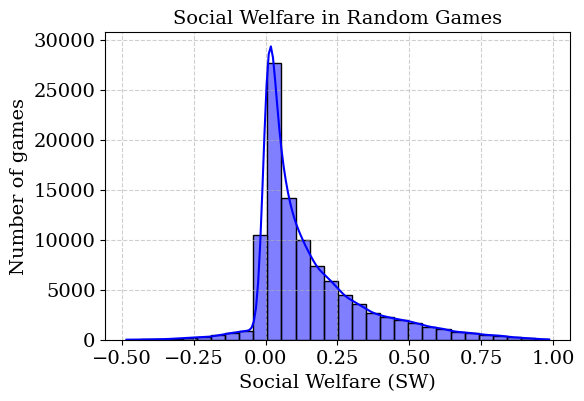

In [ ]:
# Histogram for SW distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['SW'], bins=30, kde=True, color='blue')
plt.xlabel('Social Welfare (SW)')
plt.ylabel('Number of games')
plt.title('Social Welfare in Random Games')
plt.grid(True, linestyle='--', alpha=0.6)

#plt.savefig("8b.pdf", dpi=300, bbox_inches='tight', format='pdf')
plt.show()


Social Welfare Summary Statistics for Each Equilibrium:
           Mean    Median  Variance  Standard Deviation   Minimum   Maximum
(0,0)       NaN       NaN       NaN                 NaN       NaN       NaN
(0,1)  0.019764 -0.001028  0.147626            0.384222 -0.989723  0.989252
(1,0)  0.135659  0.092195  0.032367            0.179907 -0.489194  0.957987
(1,1) -0.028309  0.005827  0.065647            0.256218 -0.953244  0.880347


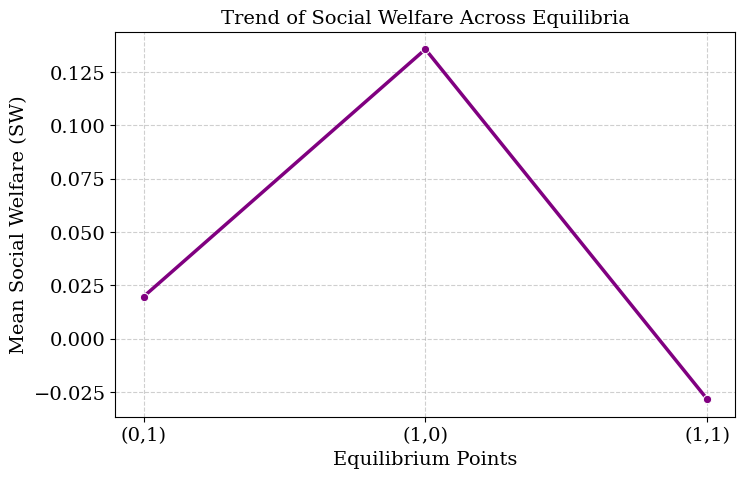

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/random_games_with_sw_avg.xlsx"  # Update the file path if needed
data = pd.read_excel(file_path)

# Define equilibrium points
eq_points = ["(0,0)", "(0,1)", "(1,0)", "(1,1)"]

# Compute summary statistics for each equilibrium
stats = {}
for eq in eq_points:
    sw_values = data.loc[data[eq] == 1, "SW"]
    stats[eq] = {
        "Mean": sw_values.mean(),
        "Median": sw_values.median(),
        "Variance": sw_values.var(),
        "Standard Deviation": sw_values.std(),
        "Minimum": sw_values.min(),
        "Maximum": sw_values.max(),
    }

# Convert stats dictionary to a DataFrame for better visualization
stats_df = pd.DataFrame(stats).T  # Transpose to make equilibrium points as rows

# Print the table
print("\nSocial Welfare Summary Statistics for Each Equilibrium:")
print(stats_df)
plt.rcParams.update({
    "font.family": "serif",  # Use a serif font (like Times New Roman)
    "font.size": 11,         # Increase font size
    "axes.labelsize": 14,    # Label size for x and y axes
    "axes.titlesize": 14,    # Title font size
    "xtick.labelsize": 14,   # X-axis tick labels
    "ytick.labelsize": 14,   # Y-axis tick labels
    "legend.fontsize": 14,   # Legend font size
    "figure.titlesize": 14   # Figure title size
})

# Plot: Trend of Mean Social Welfare Across Equilibria
plt.figure(figsize=(8, 5))
sns.lineplot(
    x=stats_df.index, y=stats_df["Mean"], marker="o", linestyle="-", color="purple", linewidth=2.5
)
plt.xlabel("Equilibrium Points")
plt.ylabel("Mean Social Welfare (SW)")
plt.title("Trend of Social Welfare Across Equilibria")
plt.grid(True, linestyle="--", alpha=0.6)

#plt.savefig("8a.pdf", dpi=300, bbox_inches='tight', format='pdf')
plt.show()

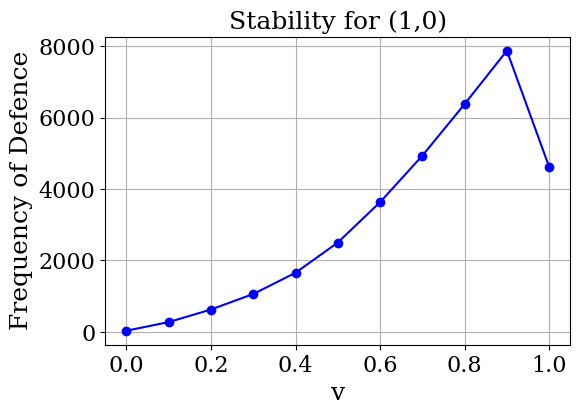

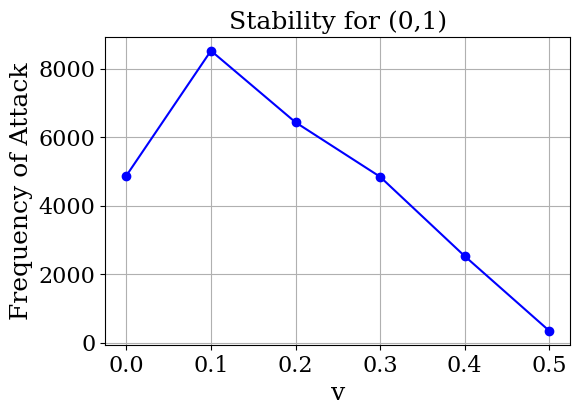

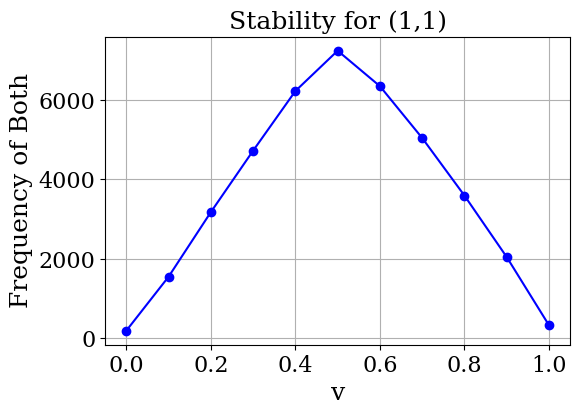

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status.xlsx')

# ✅ Filter data for each equilibrium point correctly
df_defense = df[df['(1,0)'] == 1].copy()
df_attack = df[df['(0,1)'] == 1].copy()
df_both = df[df['(1,1)'] == 1].copy()

# ✅ Round the 'v' values
df_defense['v_rounded'] = df_defense['v'].round(1)
df_attack['v_rounded'] = df_attack['v'].round(1)
df_both['v_rounded'] = df_both['v'].round(1)

# ✅ Group by rounded 'v' values and count occurrences
defense_counts = df_defense.groupby('v_rounded')['(1,0)'].count()
attack_counts = df_attack.groupby('v_rounded')['(0,1)'].count()
both_counts = df_both.groupby('v_rounded')['(1,1)'].count()

# ✅ Define font settings to avoid bold fonts
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14,         # Increase font size
    "axes.labelsize": 18,    # Label size for x and y axes
    "axes.titlesize": 18,    # Title font size
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 16,   # Legend font size
    "figure.titlesize": 16   # Figure title size
})

# ✅ Define plot names
plot_names = ["plot1.pdf", "plot2.pdf", "plot3.pdf"]
titles = ["Stability for (1,0)", "Stability for (0,1)", "Stability for (1,1)"]
datasets = [defense_counts, attack_counts, both_counts]
y_labels = ["Frequency of Defence", "Frequency of Attack", "Frequency of Both"]

# ✅ Generate and save each plot separately
for i in range(3):
    plt.figure(figsize=(6, 4))
    plt.plot(datasets[i].index, datasets[i].values, marker='o', linestyle='-', color='blue')

    # Set axis labels and title
    plt.xlabel('v')
    plt.ylabel(y_labels[i])
    plt.title(titles[i])
    plt.grid(True)

    # Save each figure with a unique name
    plt.savefig(plot_names[i], dpi=300, bbox_inches='tight', format='pdf')

    # Show the plot (optional)
    plt.show()

    # Close the figure to avoid overlapping issues
    plt.close()


Index(['game', 'a', 'b', 'c', 'd', 'w', 'v', '(0,0)', '(0,1)', '(1,0)',
       '(1,1)'],
      dtype='object')
float64
0
Processing parameter: d


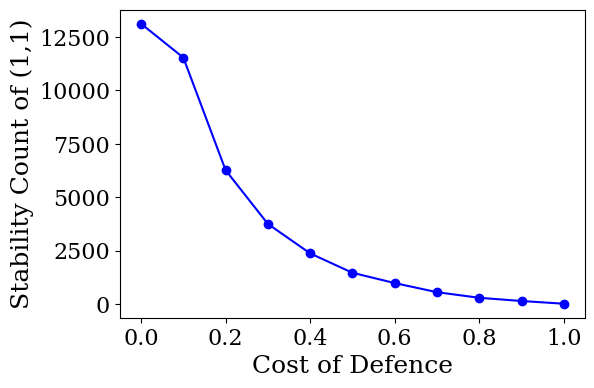

Processing parameter: c


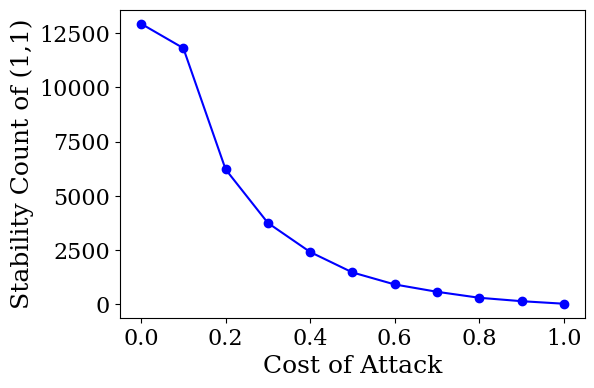

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status.xlsx')

# Filter data for (1,1) == 1
df_defense = df[df['(1,1)'] == 1].copy() # Create a copy to avoid SettingWithCopyWarning

# Apply font settings
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14,         # Increase font size
    "axes.labelsize": 18,    # Label size for x and y axes
    "axes.titlesize": 18,    # Title font size
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 16,   # Legend font size
    "figure.titlesize": 16   # Figure title size
})

# Define parameters and corresponding filenames
plot_names = {'d': 'plotaa', 'c': 'plotbb'}
parameters = list(plot_names.keys())

# Print columns to debug
print(df_defense.columns)
print(df_defense['d'].dtype) # Print data type of 'cd' column
print(df_defense['d'].isnull().sum()) # Print number of missing values in 'cd' column

# Generate and save plots separately
for param in parameters:
    print(f"Processing parameter: {param}") # Debug print
    df_defense[f'{param}_rounded'] = df_defense[param].round(1)
    param_counts = df_defense.groupby(f'{param}_rounded')['(1,1)'].count() # Count (1,1) occurrences

    # Create a new figure
    plt.figure(figsize=(6, 4))
    plt.plot(param_counts.index, param_counts.values, marker='o', linestyle='-', color='blue')

    # Set axis labels and title
    xlabel = 'Cost of Defence' if param == 'd' else 'Cost of Attack'
    plt.xlabel(xlabel)
    plt.ylabel('Stability Count of (1,1)')
    #plt.title(f"Effect of costs on the System's Stability") # Use xlabel for title

    # Save each figure with a unique name
    plt.savefig(f"{plot_names[param]}.pdf", dpi=300, bbox_inches='tight', format='pdf')

    # Show the plot (optional)
    plt.show()

    # Close the figure to avoid overlapping issues
    plt.close()

<ipython-input-22-35d49d392378>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defense[f'{param}_rounded'] = df_defense[param].round(1)


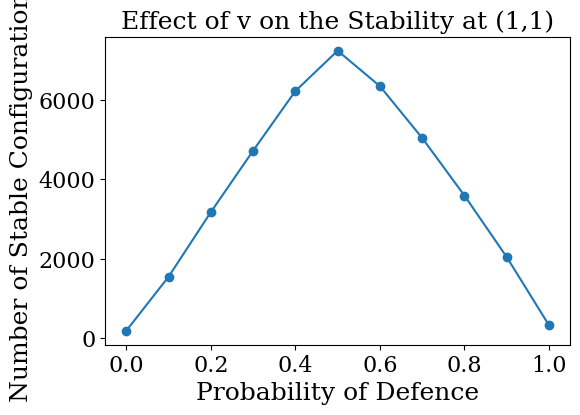

<ipython-input-22-35d49d392378>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defense[f'{param}_rounded'] = df_defense[param].round(1)


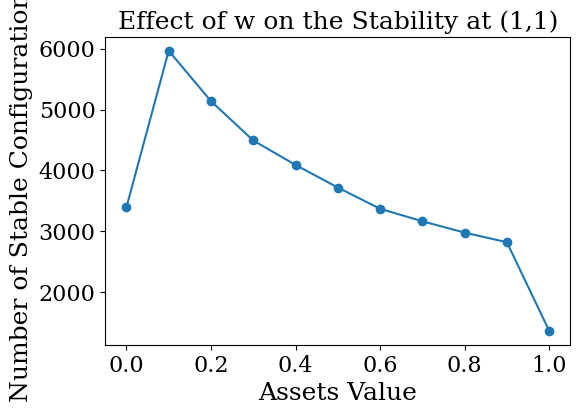

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status.xlsx')

# Filter data for (1,1) == 1
df_defense = df[df['(1,1)'] == 1]

parameters = ['v', 'w']

plt.rcParams.update({
    "font.family": "serif",  # Use a serif font (like Times New Roman)
    "font.size": 14,         # Increase font size
    "axes.labelsize": 18,    # Label size for x and y axes
    "axes.titlesize": 18,    # Title font size
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 16,   # Legend font size
    "figure.titlesize": 16   # Figure title size
})

for param in parameters:
    df_defense[f'{param}_rounded'] = df_defense[param].round(1)
    param_counts = df_defense.groupby(f'{param}_rounded')['(1,0)'].count()

    # Create a new figure for each parameter
    plt.figure(figsize=(6, 4))
    plt.plot(param_counts.index, param_counts.values, marker='o', linestyle='-')

    # Set axis labels and title
    xlabel = 'Probability of Defence' if param == 'v' else 'Assets Value'
    plt.xlabel(xlabel)
    plt.ylabel('Number of Stable Configurations')
    plt.title(f"Effect of {param} on the Stability at (1,1)")

    # Save each figure separately
    plt.savefig(f"plot_{param}.pdf", dpi=300, bbox_inches='tight', format='pdf')

    # Show the plot
    plt.show()


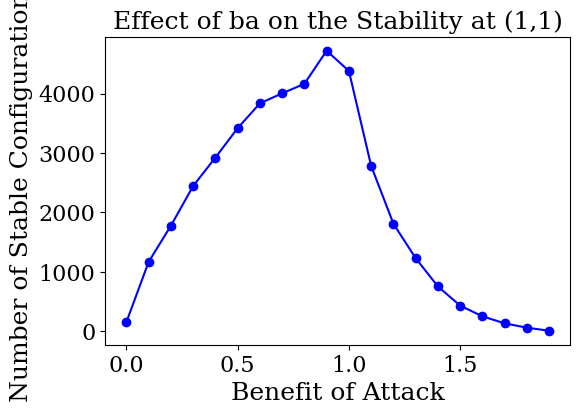

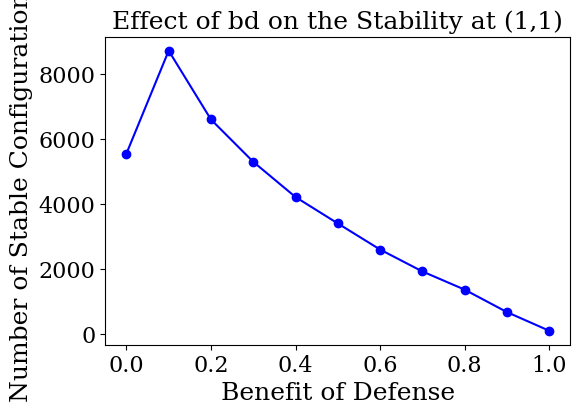

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status.xlsx')

# Filter data for (1,1) == 1
df_defense = df[df['(1,1)'] == 1].copy()

# Define the parameters to plot
parameters = ['ba', 'bd']

# Apply font settings
plt.rcParams.update({
    "font.family": "serif",  # Use a serif font (like Times New Roman)
    "font.size": 14,         # Increase font size
    "axes.labelsize": 18,    # Label size for x and y axes
    "axes.titlesize": 18,    # Title font size
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 16,   # Legend font size
    "figure.titlesize": 16   # Figure title size
})

# Generate and save plots for each parameter
for param in parameters:
    df_defense[f'{param}_rounded'] = df_defense[param].round(1)
    param_counts = df_defense.groupby(f'{param}_rounded')['(1,0)'].count()

    # Create a new figure for each parameter
    plt.figure(figsize=(6, 4))
    plt.plot(param_counts.index, param_counts.values, marker='o', linestyle='-', color='blue')

    # Set axis labels and title
    xlabel = 'Benefit of Attack' if param == 'ba' else 'Benefit of Defense'
    plt.xlabel(xlabel)
    plt.ylabel('Number of Stable Configurations')
    plt.title(f"Effect of {param} on the Stability at (1,1)")

    # Save each figure separately
    file_name = f"plot_{param}.pdf"
    plt.savefig(file_name, dpi=300, bbox_inches='tight', format='pdf')

    # Show the plot (optional)
    plt.show()

    # Close the plot to prevent overlapping issues
    plt.close()


<ipython-input-25-a7046546bd3f>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('bin')['SW'].mean().reset_index()  # Compute mean SW per bin


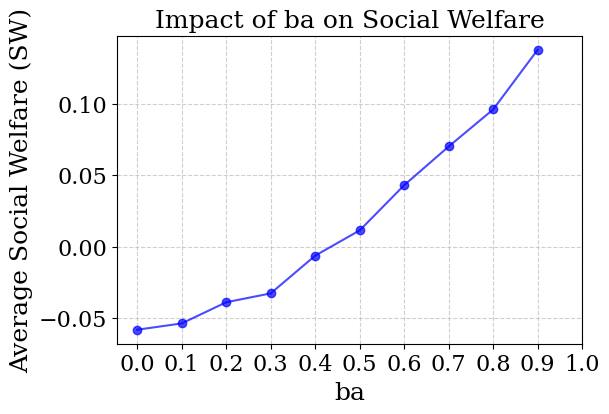

<ipython-input-25-a7046546bd3f>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('bin')['SW'].mean().reset_index()  # Compute mean SW per bin


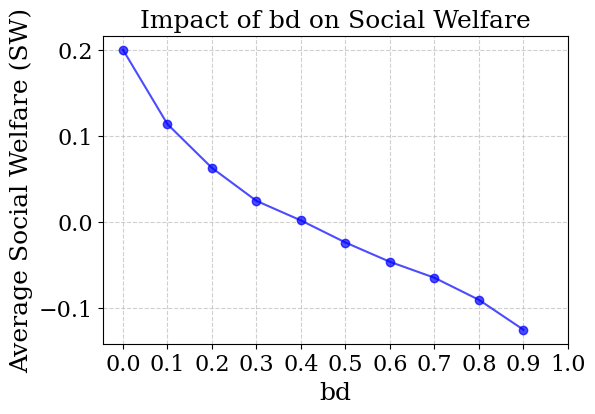

<ipython-input-25-a7046546bd3f>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('bin')['SW'].mean().reset_index()  # Compute mean SW per bin


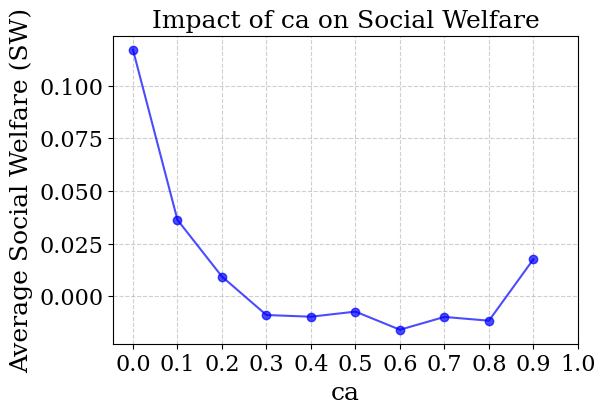

<ipython-input-25-a7046546bd3f>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('bin')['SW'].mean().reset_index()  # Compute mean SW per bin


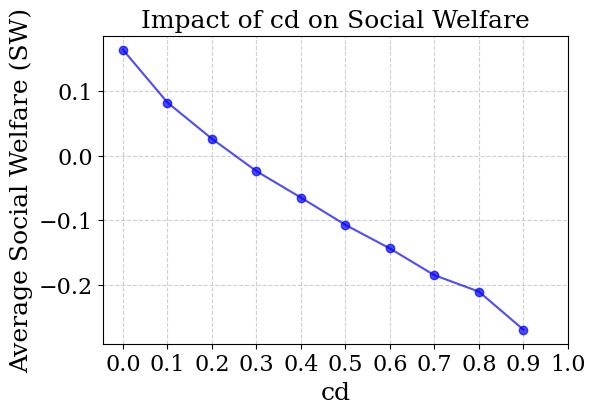

<ipython-input-25-a7046546bd3f>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('bin')['SW'].mean().reset_index()  # Compute mean SW per bin


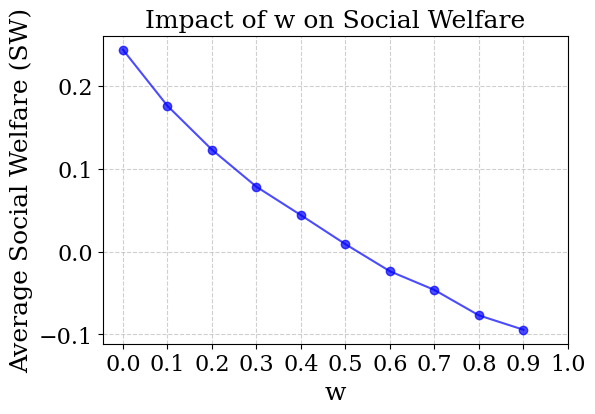

<ipython-input-25-a7046546bd3f>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('bin')['SW'].mean().reset_index()  # Compute mean SW per bin


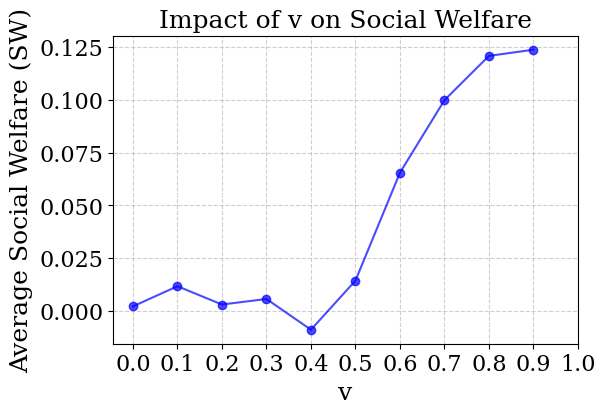

Binned line plots for parameter impact on Social Welfare generated.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
data = pd.read_excel("/content/random_games_with_sw_avg.xlsx")

# Define relevant parameters
parameters = ['ba', 'bd', 'ca', 'cd', 'w', 'v']
bin_edges = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])  # Define bins from 0 to 1

# Update global font settings (remove bold from tick labels)
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 11,         # Increase font size
    "axes.labelsize": 18,    # Label size for x and y axes
    "axes.titlesize": 18,    # Title font size
    "xtick.labelsize": 16,   # X-axis tick labels
    "ytick.labelsize": 16,   # Y-axis tick labels
    "legend.fontsize": 16,   # Legend font size
    "figure.titlesize": 16   # Figure title size
})

# Plot each parameter against SW using binned averages
for param in parameters:
    data['bin'] = pd.cut(data[param], bins=bin_edges, include_lowest=True)  # Create bins
    grouped = data.groupby('bin')['SW'].mean().reset_index()  # Compute mean SW per bin

    plt.figure(figsize=(6, 4))
    plt.plot(bin_edges[:-1], grouped['SW'], marker='o', linestyle='-', color='blue', alpha=0.7)  # Use bin_edges[:-1] for X-axis
    plt.xlabel(param)
    plt.ylabel('Average Social Welfare (SW)')
    plt.title(f'Impact of {param} on Social Welfare')
    plt.xticks(bin_edges)  # Set correct X-axis ticks
    plt.grid(True, linestyle='--', alpha=0.6)

    # Save each plot separately
    plt.savefig(f"plot_{param}.pdf", dpi=300, bbox_inches='tight', format='pdf')
    plt.show()

print("Binned line plots for parameter impact on Social Welfare generated.")


In [ ]:
import pandas as pd
from scipy.stats import wilcoxon

# -------------------------------------------------------
# Step 1: Read Excel files for each penalty level
# -------------------------------------------------------
eq_0 = pd.read_excel("eq_status.xlsx")     # Penalty p = 0
eq_01 = pd.read_excel("eq_status2.xlsx")   # Penalty p = 0.1
eq_05 = pd.read_excel("eq_status3.xlsx")   # Penalty p = 0.5

# -------------------------------------------------------
# Step 2: Define equilibrium point columns
# -------------------------------------------------------
eq_points = ["(0,0)", "(0,1)", "(1,0)", "(1,1)"]

# -------------------------------------------------------
# Step 3: Compute Wilcoxon test for each equilibrium point
# -------------------------------------------------------
print("Wilcoxon Signed-Rank Test Results (binary stability values)\n")
alpha = 0.05

for eq in eq_points:
    data0 = eq_0[eq]
    data01 = eq_01[eq]
    data05 = eq_05[eq]

    # Test penalty 0 vs 0.1
    stat_01, pval_01 = wilcoxon(data0, data01, zero_method='wilcox', alternative='two-sided')

    # Test penalty 0 vs 0.5
    stat_05, pval_05 = wilcoxon(data0, data05, zero_method='wilcox', alternative='two-sided')

    print(f"Equilibrium {eq}:")
    print(f"  p=0 vs p=0.1 → statistic={stat_01:.4f}, p-value={pval_01:.6f}")
    print(f"  p=0 vs p=0.5 → statistic={stat_05:.4f}, p-value={pval_05:.6f}")

    if pval_01 < alpha:
        print("   → Significant difference between 0 and 0.1 (p < 0.05)")
    else:
        print("   → No significant difference between 0 and 0.1")

    if pval_05 < alpha:
        print("   → Significant difference between 0 and 0.5 (p < 0.05)")
    else:
        print("   → No significant difference between 0 and 0.5")

    print("-" * 60)

Wilcoxon Signed-Rank Test Results (binary stability values)

Equilibrium (0,0):
  p=0 vs p=0.1 → statistic=0.0000, p-value=nan
  p=0 vs p=0.5 → statistic=0.0000, p-value=nan
   → No significant difference between 0 and 0.1
   → No significant difference between 0 and 0.5
------------------------------------------------------------
Equilibrium (0,1):
  p=0 vs p=0.1 → statistic=351235704.0000, p-value=0.000000
  p=0 vs p=0.5 → statistic=166560614.0000, p-value=0.000000
   → Significant difference between 0 and 0.1 (p < 0.05)
   → Significant difference between 0 and 0.5 (p < 0.05)
------------------------------------------------------------
Equilibrium (1,0):
  p=0 vs p=0.1 → statistic=410486566.5000, p-value=0.000000
  p=0 vs p=0.5 → statistic=127702070.0000, p-value=0.000000
   → Significant difference between 0 and 0.1 (p < 0.05)
   → Significant difference between 0 and 0.5 (p < 0.05)
------------------------------------------------------------
Equilibrium (1,1):
  p=0 vs p=0.1 → sta

/usr/local/lib/python3.12/dist-packages/scipy/stats/_wilcoxon.py:178: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se
